## Inferential Statistics

In [1]:
#meta 9/12/2018
#Normal distribution - estimates, PDF (probability density function) and plots

In [2]:
import math
import pandas as pd
import numpy as np
#from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt

### Normal Distribution
source: http://wade.dbsdataprojects.com/2016/03/24/using-excel-r-python-for-checking-normal-distribution/

The normal distribution with μ = 0 and σ = 1
is called the standard normal distribution, and is denoted as N(0,1).

The normal distribution is important because of the Central Limit
Theorem, which states that the population of all possible samples
of size n from a population with μ = 0 and variance σ = 1
approaches a normal distribution with mean μ and variance σ2/n
when n approaches infinity.


### i.e. Estimate students scoring 84+ on GRE
Problem:  
Assume results of a college entrance exam fit a normal distribution,
such that the mean test score is 72, and the standard deviation is 15.2.
What is the percentage of students scoring 84 or more in the exam?

Paper:  
calculate z-score (84-72)/15.2 = .7894  
lookup % of values between mu and z around .2881  
sketched a bell curve, shaded area between 0 and .2881 (before 1 std dev)  
compute area beyond 84 score: 0.5 - .2881 = around .21 or .22

Solution:  
We apply the function pnorm (R) of the normal distribution
with mean 72 and standard deviation 15.2.
Concentrating on the percentage of students scoring higher than 84,
we are interested in the upper tail of the normal distribution.

In [3]:
cutOffPoint = 84
mean = 72
stDev = 15.2

#manually calculate prob at point
def probability(cutOffPoint):
    fraction = 1 / ( (stDev) * (math.sqrt(2*math.pi)) )
    exponential = math.exp( -( (cutOffPoint - mean)**2) / ( 2 * (stDev**2) ) )
    result = fraction * exponential
    return result

print(probability(cutOffPoint))

0.019218761605975455


In [4]:
## upper tail
answer = 0
while cutOffPoint < (mean + 3*stDev):
    result = probability(cutOffPoint)
    answer += result
    cutOffPoint += 1

print('manual calculation ', answer)
print('roounding error perhaps...')



manual calculation  0.2232332750433743
roounding error perhaps...


In [5]:
## reset cut-off point
cutOffPoint = 84
print('calculation with scipy - no rounding error')
print('CDF up to the point')
print (stats.norm(mean, stDev).cdf(cutOffPoint))
print('CDF after the point')
print( 1 - (stats.norm(mean, stDev).cdf(cutOffPoint)) )

calculation with scipy - no rounding error
CDF up to the point
0.7850823976887276
CDF after the point
0.21491760231127244


In [6]:
#What is the percentage of students scoring 84 or more in the exam?
print ('What is the percentage of students scoring 84 or more in the exam?')
1 - stats.norm(mean, stDev).cdf(cutOffPoint)

What is the percentage of students scoring 84 or more in the exam?


0.21491760231127244

Consider the following R code:

dnorm(84, mean = 72, sd = 15.2)  # output 0.0192187  
pnorm(84, mean = 72, sd = 15.2, lower.tail = FALSE) # output 0.2149176

Answer:
The percentage of students scoring 84 or more in the college entrance exam is 21.5%.

### My Plot
Visualise a sample with 100 scores

Reference  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[Plotting Distributions with matplotlib and scipy](https://emredjan.github.io/blog/2017/07/19/plotting-distributions/)

Step 0.  Manually calculate PDF  
Notice don't need individual scores, because normal distribution parameters give us all the info needed to plot PDF.

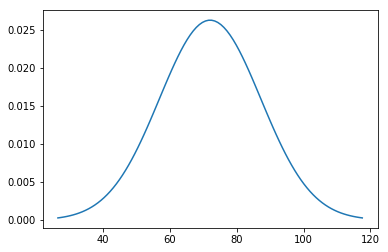

In [7]:
mu = mean
sigma = stDev
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#was x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)

#manually calculate y, which is normal pdf
y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))
#alternative way to compute pdf
#y = (1 / ( sigma * (np.sqrt(2 * np.pi)))) * (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

#plot
plt.plot(x, y);

Step 1. Use scipy.stats  
Generate random scores and plot their histogram (counts) to later compare with PDF plot.  
Note: using small n=100 for display purposes only.  Totally aware that larger n results in better estimates.

Random scores: 
 [103.15472406  77.0378995   93.30087448  91.70309054  67.88017676
  73.52016536  76.53492089  61.07914299  84.50387819  70.84805478
  89.19384695  73.02043165  69.36427821  60.84902434  53.41430941
  66.26721234  45.58144305  58.28622879  80.45895813  44.45499566
  67.0761483   67.59370113  88.17029766  64.93315934  77.5589836
  90.26373614  86.30932529  84.74064164  80.72289375  56.87027299
  61.30588211  73.42246463  82.32547163  67.56200115  47.48213702
  91.53572086  60.30064324  61.50866364  68.78726814  75.75486586
  88.60289585  56.45719936  70.26054274  56.93304625  65.66413901
  83.02271479  82.9969983   56.78718352  50.20804489  54.64532368
  76.44080555  66.40765381  67.20514822  72.07857423  58.65127367
  92.11027295  43.39247213  50.67008814  55.99668868  65.41730344
  86.64903403  73.39932845  71.61705828  52.53807715  66.85209241
  65.45238723  64.79750029  45.88843004  59.66703842  77.10493902
  75.37309095  62.40100009  83.43504802  65.27802232  92.973

(array([ 5.,  6., 17., 19., 14., 12., 10.,  8.,  7.,  2.]),
 array([ 43.39247213,  49.37596453,  55.35945692,  61.34294931,
         67.3264417 ,  73.3099341 ,  79.29342649,  85.27691888,
         91.26041128,  97.24390367, 103.22739606]),
 <a list of 10 Patch objects>)

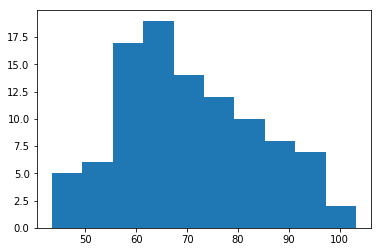

In [8]:
#generate random numbers
myNormal = stats.norm(mu,sigma)
random_scores = myNormal.rvs(size=100)

print ('Random scores: \n', random_scores)

#plot random scores

plt.hist(random_scores, density=False)

### Draw Histogram and PDF

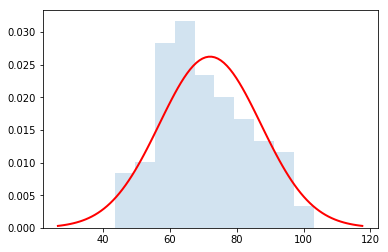

In [9]:
fig, ax = plt.subplots(1, 1)
#draw histogram
ax.hist(random_scores, density=True, histtype='stepfilled', alpha=0.2)

#display the pdf
ax.plot(x, myNormal.pdf(x), 'r-', lw=2) #, label='frozen pdf'
plt.show()


### Xtra
Notice that manually calculated PDF y == myNormal.pdf(x)

In [10]:
y

array([0.00029157, 0.00034907, 0.00041637, 0.00049482, 0.00058591,
       0.00069122, 0.00081246, 0.00095147, 0.00111019, 0.00129062,
       0.00149488, 0.00172512, 0.00198353, 0.00227227, 0.00259351,
       0.00294931, 0.00334162, 0.00377224, 0.00424273, 0.00475441,
       0.00530827, 0.00590492, 0.00654455, 0.00722687, 0.00795107,
       0.00871577, 0.00951898, 0.0103581 , 0.01122987, 0.01213037,
       0.01305504, 0.01399868, 0.01495549, 0.01591913, 0.01688272,
       0.017839  , 0.01878034, 0.01969886, 0.02058655, 0.02143536,
       0.02223734, 0.02298475, 0.02367017, 0.02428666, 0.02482784,
       0.02528803, 0.02566232, 0.02594666, 0.02613797, 0.02623415,
       0.02623415, 0.02613797, 0.02594666, 0.02566232, 0.02528803,
       0.02482784, 0.02428666, 0.02367017, 0.02298475, 0.02223734,
       0.02143536, 0.02058655, 0.01969886, 0.01878034, 0.017839  ,
       0.01688272, 0.01591913, 0.01495549, 0.01399868, 0.01305504,
       0.01213037, 0.01122987, 0.0103581 , 0.00951898, 0.00871

In [11]:
myNormal.pdf(x)

array([0.00029157, 0.00034907, 0.00041637, 0.00049482, 0.00058591,
       0.00069122, 0.00081246, 0.00095147, 0.00111019, 0.00129062,
       0.00149488, 0.00172512, 0.00198353, 0.00227227, 0.00259351,
       0.00294931, 0.00334162, 0.00377224, 0.00424273, 0.00475441,
       0.00530827, 0.00590492, 0.00654455, 0.00722687, 0.00795107,
       0.00871577, 0.00951898, 0.0103581 , 0.01122987, 0.01213037,
       0.01305504, 0.01399868, 0.01495549, 0.01591913, 0.01688272,
       0.017839  , 0.01878034, 0.01969886, 0.02058655, 0.02143536,
       0.02223734, 0.02298475, 0.02367017, 0.02428666, 0.02482784,
       0.02528803, 0.02566232, 0.02594666, 0.02613797, 0.02623415,
       0.02623415, 0.02613797, 0.02594666, 0.02566232, 0.02528803,
       0.02482784, 0.02428666, 0.02367017, 0.02298475, 0.02223734,
       0.02143536, 0.02058655, 0.01969886, 0.01878034, 0.017839  ,
       0.01688272, 0.01591913, 0.01495549, 0.01399868, 0.01305504,
       0.01213037, 0.01122987, 0.0103581 , 0.00951898, 0.00871